#geopandas 

#https://lvis.gsfc.nasa.gov/workshop/LVIS_QGIS_Tutorial_Gabon.pdf

In [1]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *

Bring all the data data in 

In [2]:
# Geopandas 

In [3]:
Trees_RH = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Trees_Closest.shp')

In [80]:
Trees_RH.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH.csv')

In [81]:
Trees_RH = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH.csv')

In [4]:
#Changing CRS 
Trees_RH_4326= Trees_RH.to_crs(epsg=4326)

In [5]:
Trees_RH.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'Plot_3', 'geometry'],
      dtype='object')

In [6]:
Trees_RH.head(3)

,Join_Count,D_LVIS,TARGET_FID,plot,subplot,tree_date,family,species,wsg,tree,...,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X_1,POINT_Y_1,Plot_3,geometry
0,1,6.424267,1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535829.680 61322.481)
1,1,7.669181,2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535827.853 61327.054)
2,1,9.654939,3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535829.889 61327.977)


In [7]:
subplots = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Plot-1ha.shp')

In [8]:
subplots

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,sba_ha,swsg_ba,h_t_max,field_35,field_36,field_37,field_38,field_39,field_40,geometry
0,NASA01,1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,4.34,0.48,26.57,None,None,None,None,None,None,"POLYGON ((535830.250 61412.750, 535924.750 614..."
1,NASA02,1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,25.23,0.62,59.23,None,None,None,None,None,None,"POLYGON ((535401.750 61010.500, 535495.250 610..."
2,NASA03,1,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,8.20,0.46,36.77,None,None,None,None,None,None,"POLYGON ((536082.750 60756.000, 536177.250 607..."
3,NASA05,1,2016-02-01,TropRF,3109.44,25.60,Evergreen Broadleaf trees,0.563211,9.342395,C,...,12.72,0.50,31.00,None,None,None,None,None,None,"POLYGON ((538050.250 62300.000, 538148.000 623..."
4,NASA09,1,2016-02-01,TropRF,3090.26,25.66,Evergreen Broadleaf trees,0.546273,9.329873,C,...,0.76,0.50,20.30,None,None,None,None,None,None,"POLYGON ((536662.750 60428.250, 536663.000 604..."
5,NASA10,1,2016-02-01,TropRF,3084.95,25.67,Evergreen Broadleaf trees,0.540623,9.323478,C,...,12.97,0.52,34.00,None,None,None,None,None,None,"POLYGON ((535949.500 59802.250, 536039.250 598..."
6,NASA11,1,2016-02-01,TropRF,3083.93,25.67,Evergreen Broadleaf trees,0.538705,9.319829,C,...,6.04,0.49,23.11,None,None,None,None,None,None,"POLYGON ((535537.750 59601.250, 535627.750 595..."
7,NASA13,1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,26.03,0.59,38.39,None,None,None,None,None,None,"POLYGON ((539709.000 63809.000, 539811.250 637..."
8,NASA14,1,2016-02-01,TropRF,3052.17,25.82,Evergreen Broadleaf trees,0.582390,9.422104,C,...,21.02,0.48,36.80,None,None,None,None,None,None,"POLYGON ((546914.750 64424.250, 547021.500 644..."
9,NASA19,1,2016-02-01,TropRF,3098.05,25.70,Evergreen Broadleaf trees,0.578383,9.375730,C,...,1.24,0.49,18.04,None,None,None,None,None,None,"POLYGON ((541759.750 63984.000, 541859.500 639..."


In [9]:
#Changing CRS 
subplots_4326= subplots.to_crs(epsg=4326)

In [10]:
subplots_4326.columns

Index(['plot', 'subplot', 'date', 'vegetation', 'map', 'mat', 'pft_name',
       'latitude', 'longitude', 'p_origin', 'p_orientat', 'p_shape',
       'p_majoraxi', 'p_minoraxi', 'p_epsg', 'p_area', 'p_mindiam', 'sp_ix',
       'sp_iy', 'dft', 'agb', 'agb_valid', 'agb_lower', 'agb_upper', 'agbd_ha',
       'agbd_ha_lo', 'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba',
       'h_t_max', 'field_35', 'field_36', 'field_37', 'field_38', 'field_39',
       'field_40', 'geometry'],
      dtype='object')

In [11]:
subplots_4326_Keep = ['plot','geometry']

In [12]:
subplots_4326 = subplots_4326[subplots_4326_Keep]

In [13]:
subplots_4326.columns

Index(['plot', 'geometry'], dtype='object')

C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


<AxesSubplot:>

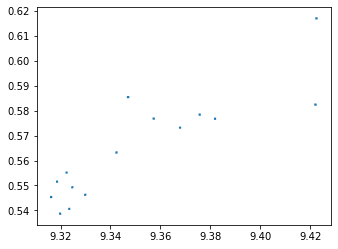

In [14]:
subplots_4326.plot()

In [15]:
Trees_RH_subplots = gpd.overlay(Trees_RH_4326,subplots_4326, how = 'intersection')

In [16]:
Trees_RH_subplots

,Join_Count,D_LVIS,TARGET_FID,plot_1,subplot,tree_date,family,species,wsg,tree,...,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X_1,POINT_Y_1,Plot_3,plot_2,geometry
0,1,6.424267,1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA01,POINT (9.32201 0.55479)
1,1,7.669181,2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA01,POINT (9.32199 0.55484)
2,1,9.654939,3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA01,POINT (9.32201 0.55484)
3,1,10.448032,4,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6504,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA01,POINT (9.32201 0.55485)
4,1,7.489962,5,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6505,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA01,POINT (9.32200 0.55483)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6122,1,4.794827,6628,NASA23,14,2016-02-21,NA,NA,0.534143,3903,...,7719.81,-999,1,1,1,9.316560,0.545585,None,NASA23,POINT (9.31652 0.54556)
6123,1,4.721321,6629,NASA23,14,2016-02-21,NA,NA,0.534143,3904,...,7719.21,-999,1,1,1,9.316476,0.545584,None,NASA23,POINT (9.31652 0.54557)
6124,1,3.696850,6630,NASA23,14,2016-02-21,Myristicaceae,Pycnanthus angolensis,0.408900,3905,...,7719.21,-999,1,1,1,9.316476,0.545584,None,NASA23,POINT (9.31651 0.54557)
6125,1,0.323598,6631,NASA23,14,2016-02-21,Melastomataceae,Dichaetanthera sp.,0.609414,3906,...,7719.81,-999,1,1,1,9.316560,0.545585,None,NASA23,POINT (9.31656 0.54558)


In [17]:
Trees_RH_subplots.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot_1', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'Plot_3', 'plot_2', 'geometry'],
      dtype='object')

In [18]:
Trees_RH_subplots['plot_3'] = Trees_RH_subplots['plot_2']

In [19]:
Trees_RH_subplots.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot_1', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'Plot_3', 'plot_2', 'geometry', 'plot_3'],
      dtype='object')

In [20]:
#SUM

In [21]:
sum = ['plot_2', 'm_agb']

In [22]:
Trees_RH_sum= Trees_RH_subplots[sum]

In [23]:
Trees_RH_sum = Trees_RH_sum.groupby(by='plot_2').sum('m_agb')

In [24]:
Trees_RH_sum.columns

Index(['m_agb'], dtype='object')

In [25]:
Trees_RH_sum

,m_agb
plot_2,
NASA01,25008.06
NASA02,236197.41
NASA03,38188.37
NASA05,79872.01
NASA09,3357.88
NASA10,73088.73
NASA11,28759.54
NASA13,226746.25
NASA14,140166.01


In [26]:
#MEAN

In [27]:
m = ['plot_3','RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100']

In [28]:
Trees_RH_mean = Trees_RH_subplots[m]

In [29]:
Trees_RH_mean

,plot_3,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
0,NASA01,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
1,NASA01,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
2,NASA01,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
3,NASA01,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
4,NASA01,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6122,NASA23,-4.04,-3.45,-2.92,-2.47,-2.10,-1.72,-1.35,-1.05,-0.68,...,0.82,1.19,1.64,2.17,2.99,3.29,3.59,4.04,4.78,7.25
6123,NASA23,-3.67,-3.07,-2.55,-2.17,-1.80,-1.42,-1.13,-0.83,-0.53,...,0.82,1.19,1.57,2.09,2.91,3.21,3.51,4.04,4.93,7.10
6124,NASA23,-3.67,-3.07,-2.55,-2.17,-1.80,-1.42,-1.13,-0.83,-0.53,...,0.82,1.19,1.57,2.09,2.91,3.21,3.51,4.04,4.93,7.10
6125,NASA23,-4.04,-3.45,-2.92,-2.47,-2.10,-1.72,-1.35,-1.05,-0.68,...,0.82,1.19,1.64,2.17,2.99,3.29,3.59,4.04,4.78,7.25


In [30]:
Trees_RH_mean = Trees_RH_mean.groupby(by='plot_3').mean()

In [31]:
Trees_RH_mean

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA01,-1.473450,-0.974803,-0.556594,-0.155371,0.255022,0.665066,1.116463,1.616070,2.121921,2.581266,...,4.246419,4.659782,5.172620,5.923362,7.031703,7.411266,7.836769,8.344978,9.131703,10.683231
NASA02,4.046312,6.031445,7.593080,8.979183,10.363973,11.821654,13.339049,14.714392,15.897529,16.980038,...,22.523840,23.885989,25.316426,26.860475,29.032662,29.661217,30.504354,32.219297,33.528498,35.437757
NASA03,0.857569,2.243059,3.342510,4.257412,5.081216,5.800078,6.448275,7.072118,7.701608,8.394980,...,11.425098,12.440353,13.483451,14.709176,16.703412,17.166196,17.693294,18.320196,19.223216,21.057255
NASA05,0.623527,2.537889,4.861879,6.215847,7.140766,7.921067,8.775313,10.049281,12.368561,13.857053,...,17.970974,20.019861,22.008840,23.648770,26.002367,26.997193,28.345777,30.389954,32.159698,35.448213
NASA09,-2.692268,-2.137938,-1.698454,-1.324536,-0.982371,-0.671649,-0.366598,-0.074639,0.218660,0.526907,...,1.935979,2.420206,2.966804,3.715155,4.971856,5.376907,5.843711,6.444948,7.424433,9.323196
NASA10,-1.024177,0.666076,3.845570,5.234430,5.924557,6.524304,7.106709,7.645443,8.063418,8.571519,...,10.811519,11.603797,12.499494,13.382152,14.524051,14.857468,15.336709,16.421772,18.865949,22.373165
NASA11,0.670000,5.380000,15.400000,19.440000,21.080000,22.580000,23.850000,24.970000,25.870000,26.690000,...,28.930000,29.460000,29.980000,30.650000,31.480000,31.700000,32.080000,32.520000,33.270000,34.920000
NASA13,3.553888,5.624914,7.415849,8.849601,10.042531,11.284652,12.527902,13.652566,14.818620,15.849510,...,20.073877,21.576716,22.745849,23.991460,25.771072,26.315849,26.975621,27.765234,29.045371,31.307640
NASA14,4.103670,5.978852,7.325965,8.426330,9.326296,10.149357,10.919026,11.643548,12.333548,12.978765,...,15.621913,16.422974,17.336922,18.392696,19.794330,20.210591,20.748609,21.420122,22.404470,24.216191


In [32]:
#GEO 

In [33]:
geo = ['plot','geometry']

In [34]:
Trees_RH_geo = subplots[geo]

In [35]:
Trees_RH_geo

,plot,geometry
0,NASA01,"POLYGON ((535830.250 61412.750, 535924.750 614..."
1,NASA02,"POLYGON ((535401.750 61010.500, 535495.250 610..."
2,NASA03,"POLYGON ((536082.750 60756.000, 536177.250 607..."
3,NASA05,"POLYGON ((538050.250 62300.000, 538148.000 623..."
4,NASA09,"POLYGON ((536662.750 60428.250, 536663.000 604..."
5,NASA10,"POLYGON ((535949.500 59802.250, 536039.250 598..."
6,NASA11,"POLYGON ((535537.750 59601.250, 535627.750 595..."
7,NASA13,"POLYGON ((539709.000 63809.000, 539811.250 637..."
8,NASA14,"POLYGON ((546914.750 64424.250, 547021.500 644..."
9,NASA19,"POLYGON ((541759.750 63984.000, 541859.500 639..."


In [36]:
Trees_RH_mean

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA01,-1.473450,-0.974803,-0.556594,-0.155371,0.255022,0.665066,1.116463,1.616070,2.121921,2.581266,...,4.246419,4.659782,5.172620,5.923362,7.031703,7.411266,7.836769,8.344978,9.131703,10.683231
NASA02,4.046312,6.031445,7.593080,8.979183,10.363973,11.821654,13.339049,14.714392,15.897529,16.980038,...,22.523840,23.885989,25.316426,26.860475,29.032662,29.661217,30.504354,32.219297,33.528498,35.437757
NASA03,0.857569,2.243059,3.342510,4.257412,5.081216,5.800078,6.448275,7.072118,7.701608,8.394980,...,11.425098,12.440353,13.483451,14.709176,16.703412,17.166196,17.693294,18.320196,19.223216,21.057255
NASA05,0.623527,2.537889,4.861879,6.215847,7.140766,7.921067,8.775313,10.049281,12.368561,13.857053,...,17.970974,20.019861,22.008840,23.648770,26.002367,26.997193,28.345777,30.389954,32.159698,35.448213
NASA09,-2.692268,-2.137938,-1.698454,-1.324536,-0.982371,-0.671649,-0.366598,-0.074639,0.218660,0.526907,...,1.935979,2.420206,2.966804,3.715155,4.971856,5.376907,5.843711,6.444948,7.424433,9.323196
NASA10,-1.024177,0.666076,3.845570,5.234430,5.924557,6.524304,7.106709,7.645443,8.063418,8.571519,...,10.811519,11.603797,12.499494,13.382152,14.524051,14.857468,15.336709,16.421772,18.865949,22.373165
NASA11,0.670000,5.380000,15.400000,19.440000,21.080000,22.580000,23.850000,24.970000,25.870000,26.690000,...,28.930000,29.460000,29.980000,30.650000,31.480000,31.700000,32.080000,32.520000,33.270000,34.920000
NASA13,3.553888,5.624914,7.415849,8.849601,10.042531,11.284652,12.527902,13.652566,14.818620,15.849510,...,20.073877,21.576716,22.745849,23.991460,25.771072,26.315849,26.975621,27.765234,29.045371,31.307640
NASA14,4.103670,5.978852,7.325965,8.426330,9.326296,10.149357,10.919026,11.643548,12.333548,12.978765,...,15.621913,16.422974,17.336922,18.392696,19.794330,20.210591,20.748609,21.420122,22.404470,24.216191


In [46]:
Trees_RH_mean.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_mean.csv')

In [47]:
Trees_RH_mean = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_mean.csv')

In [48]:
Trees_RH_mean

,plot_3,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
0,NASA01,-1.473450,-0.974803,-0.556594,-0.155371,0.255022,0.665066,1.116463,1.616070,2.121921,...,4.246419,4.659782,5.172620,5.923362,7.031703,7.411266,7.836769,8.344978,9.131703,10.683231
1,NASA02,4.046312,6.031445,7.593080,8.979183,10.363973,11.821654,13.339049,14.714392,15.897529,...,22.523840,23.885989,25.316426,26.860475,29.032662,29.661217,30.504354,32.219297,33.528498,35.437757
2,NASA03,0.857569,2.243059,3.342510,4.257412,5.081216,5.800078,6.448275,7.072118,7.701608,...,11.425098,12.440353,13.483451,14.709176,16.703412,17.166196,17.693294,18.320196,19.223216,21.057255
3,NASA05,0.623527,2.537889,4.861879,6.215847,7.140766,7.921067,8.775313,10.049281,12.368561,...,17.970974,20.019861,22.008840,23.648770,26.002367,26.997193,28.345777,30.389954,32.159698,35.448213
4,NASA09,-2.692268,-2.137938,-1.698454,-1.324536,-0.982371,-0.671649,-0.366598,-0.074639,0.218660,...,1.935979,2.420206,2.966804,3.715155,4.971856,5.376907,5.843711,6.444948,7.424433,9.323196
5,NASA10,-1.024177,0.666076,3.845570,5.234430,5.924557,6.524304,7.106709,7.645443,8.063418,...,10.811519,11.603797,12.499494,13.382152,14.524051,14.857468,15.336709,16.421772,18.865949,22.373165
6,NASA11,0.670000,5.380000,15.400000,19.440000,21.080000,22.580000,23.850000,24.970000,25.870000,...,28.930000,29.460000,29.980000,30.650000,31.480000,31.700000,32.080000,32.520000,33.270000,34.920000
7,NASA13,3.553888,5.624914,7.415849,8.849601,10.042531,11.284652,12.527902,13.652566,14.818620,...,20.073877,21.576716,22.745849,23.991460,25.771072,26.315849,26.975621,27.765234,29.045371,31.307640
8,NASA14,4.103670,5.978852,7.325965,8.426330,9.326296,10.149357,10.919026,11.643548,12.333548,...,15.621913,16.422974,17.336922,18.392696,19.794330,20.210591,20.748609,21.420122,22.404470,24.216191
9,NASA19,-1.496406,-1.120000,-0.832917,-0.573906,-0.325833,-0.099531,0.160833,0.446198,0.796615,...,3.118281,3.683854,4.435104,5.393229,6.901250,7.267344,7.723438,8.282969,9.054375,10.585573


In [49]:
Trees_RH_sum.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_sum.csv')

In [50]:
Trees_RH_sum = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_sum.csv')

In [52]:
Trees_RH_sum

,plot_2,m_agb
0,NASA01,25008.06
1,NASA02,236197.41
2,NASA03,38188.37
3,NASA05,79872.01
4,NASA09,3357.88
5,NASA10,73088.73
6,NASA11,28759.54
7,NASA13,226746.25
8,NASA14,140166.01
9,NASA19,4969.84


In [53]:
#Reducing 

In [54]:
#https://realpython.com/pandas-merge-join-and-concat/

In [57]:
Tree_RH_merged1= Trees_RH_mean.set_index('plot_3').join( Trees_RH_sum.set_index('plot_2'))

In [60]:
Tree_RH_merged1

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,m_agb
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA01,-1.473450,-0.974803,-0.556594,-0.155371,0.255022,0.665066,1.116463,1.616070,2.121921,2.581266,...,4.659782,5.172620,5.923362,7.031703,7.411266,7.836769,8.344978,9.131703,10.683231,25008.06
NASA02,4.046312,6.031445,7.593080,8.979183,10.363973,11.821654,13.339049,14.714392,15.897529,16.980038,...,23.885989,25.316426,26.860475,29.032662,29.661217,30.504354,32.219297,33.528498,35.437757,236197.41
NASA03,0.857569,2.243059,3.342510,4.257412,5.081216,5.800078,6.448275,7.072118,7.701608,8.394980,...,12.440353,13.483451,14.709176,16.703412,17.166196,17.693294,18.320196,19.223216,21.057255,38188.37
NASA05,0.623527,2.537889,4.861879,6.215847,7.140766,7.921067,8.775313,10.049281,12.368561,13.857053,...,20.019861,22.008840,23.648770,26.002367,26.997193,28.345777,30.389954,32.159698,35.448213,79872.01
NASA09,-2.692268,-2.137938,-1.698454,-1.324536,-0.982371,-0.671649,-0.366598,-0.074639,0.218660,0.526907,...,2.420206,2.966804,3.715155,4.971856,5.376907,5.843711,6.444948,7.424433,9.323196,3357.88
NASA10,-1.024177,0.666076,3.845570,5.234430,5.924557,6.524304,7.106709,7.645443,8.063418,8.571519,...,11.603797,12.499494,13.382152,14.524051,14.857468,15.336709,16.421772,18.865949,22.373165,73088.73
NASA11,0.670000,5.380000,15.400000,19.440000,21.080000,22.580000,23.850000,24.970000,25.870000,26.690000,...,29.460000,29.980000,30.650000,31.480000,31.700000,32.080000,32.520000,33.270000,34.920000,28759.54
NASA13,3.553888,5.624914,7.415849,8.849601,10.042531,11.284652,12.527902,13.652566,14.818620,15.849510,...,21.576716,22.745849,23.991460,25.771072,26.315849,26.975621,27.765234,29.045371,31.307640,226746.25
NASA14,4.103670,5.978852,7.325965,8.426330,9.326296,10.149357,10.919026,11.643548,12.333548,12.978765,...,16.422974,17.336922,18.392696,19.794330,20.210591,20.748609,21.420122,22.404470,24.216191,140166.01


In [78]:
Tree_RH_merged1.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Tree_RH_plot1.csv')

In [79]:
Tree_RH_merged1 = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Tree_RH_plot1.csv')

In [65]:
Tree_RH_merged1.columns

Index(['plot_3', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40',
       'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85',
       'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100', 'm_agb'],
      dtype='object')

In [66]:
Trees_RH_geo

,plot,geometry
0,NASA01,"POLYGON ((535830.250 61412.750, 535924.750 614..."
1,NASA02,"POLYGON ((535401.750 61010.500, 535495.250 610..."
2,NASA03,"POLYGON ((536082.750 60756.000, 536177.250 607..."
3,NASA05,"POLYGON ((538050.250 62300.000, 538148.000 623..."
4,NASA09,"POLYGON ((536662.750 60428.250, 536663.000 604..."
5,NASA10,"POLYGON ((535949.500 59802.250, 536039.250 598..."
6,NASA11,"POLYGON ((535537.750 59601.250, 535627.750 595..."
7,NASA13,"POLYGON ((539709.000 63809.000, 539811.250 637..."
8,NASA14,"POLYGON ((546914.750 64424.250, 547021.500 644..."
9,NASA19,"POLYGON ((541759.750 63984.000, 541859.500 639..."


In [70]:
Tree_RH_Plots= Tree_RH_merged1.set_index('plot_3').join( Trees_RH_geo.set_index('plot'))

In [71]:
Tree_RH_Plots

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,m_agb,geometry
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA01,-1.473450,-0.974803,-0.556594,-0.155371,0.255022,0.665066,1.116463,1.616070,2.121921,2.581266,...,5.172620,5.923362,7.031703,7.411266,7.836769,8.344978,9.131703,10.683231,25008.06,"POLYGON ((535830.250 61412.750, 535924.750 614..."
NASA02,4.046312,6.031445,7.593080,8.979183,10.363973,11.821654,13.339049,14.714392,15.897529,16.980038,...,25.316426,26.860475,29.032662,29.661217,30.504354,32.219297,33.528498,35.437757,236197.41,"POLYGON ((535401.750 61010.500, 535495.250 610..."
NASA03,0.857569,2.243059,3.342510,4.257412,5.081216,5.800078,6.448275,7.072118,7.701608,8.394980,...,13.483451,14.709176,16.703412,17.166196,17.693294,18.320196,19.223216,21.057255,38188.37,"POLYGON ((536082.750 60756.000, 536177.250 607..."
NASA05,0.623527,2.537889,4.861879,6.215847,7.140766,7.921067,8.775313,10.049281,12.368561,13.857053,...,22.008840,23.648770,26.002367,26.997193,28.345777,30.389954,32.159698,35.448213,79872.01,"POLYGON ((538050.250 62300.000, 538148.000 623..."
NASA09,-2.692268,-2.137938,-1.698454,-1.324536,-0.982371,-0.671649,-0.366598,-0.074639,0.218660,0.526907,...,2.966804,3.715155,4.971856,5.376907,5.843711,6.444948,7.424433,9.323196,3357.88,"POLYGON ((536662.750 60428.250, 536663.000 604..."
NASA10,-1.024177,0.666076,3.845570,5.234430,5.924557,6.524304,7.106709,7.645443,8.063418,8.571519,...,12.499494,13.382152,14.524051,14.857468,15.336709,16.421772,18.865949,22.373165,73088.73,"POLYGON ((535949.500 59802.250, 536039.250 598..."
NASA11,0.670000,5.380000,15.400000,19.440000,21.080000,22.580000,23.850000,24.970000,25.870000,26.690000,...,29.980000,30.650000,31.480000,31.700000,32.080000,32.520000,33.270000,34.920000,28759.54,"POLYGON ((535537.750 59601.250, 535627.750 595..."
NASA13,3.553888,5.624914,7.415849,8.849601,10.042531,11.284652,12.527902,13.652566,14.818620,15.849510,...,22.745849,23.991460,25.771072,26.315849,26.975621,27.765234,29.045371,31.307640,226746.25,"POLYGON ((539709.000 63809.000, 539811.250 637..."
NASA14,4.103670,5.978852,7.325965,8.426330,9.326296,10.149357,10.919026,11.643548,12.333548,12.978765,...,17.336922,18.392696,19.794330,20.210591,20.748609,21.420122,22.404470,24.216191,140166.01,"POLYGON ((546914.750 64424.250, 547021.500 644..."


In [47]:
#TreesRH13_22.columns

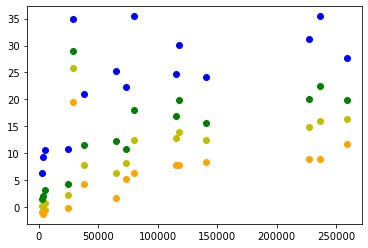

In [73]:
#matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.ZG,color='r') 
matplotlib.pyplot.scatter(Tree_RH_Plots.m_agb,Tree_RH_Plots.RH25,color='orange') 
matplotlib.pyplot.scatter(Tree_RH_Plots.m_agb,Tree_RH_Plots.RH50,color='y')
matplotlib.pyplot.scatter(Tree_RH_Plots.m_agb,Tree_RH_Plots.RH75,color='g')
matplotlib.pyplot.scatter(Tree_RH_Plots.m_agb,Tree_RH_Plots.RH100,color='b')
matplotlib.pyplot.show()

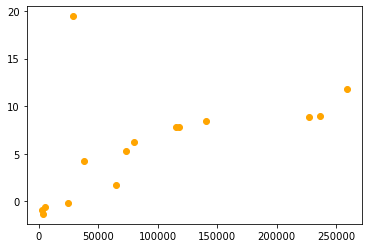

In [74]:
matplotlib.pyplot.scatter(Tree_RH_Plots.m_agb,Tree_RH_Plots.RH25,color='orange')

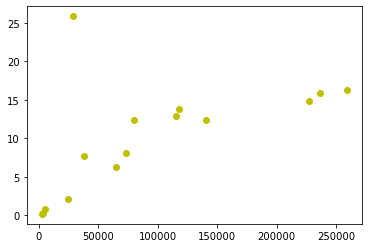

In [75]:
matplotlib.pyplot.scatter(Tree_RH_Plots.m_agb,Tree_RH_Plots.RH50,color='y')

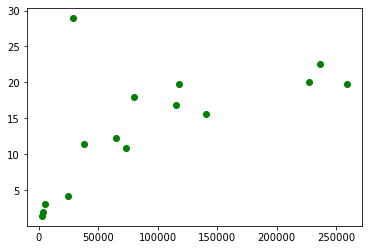

In [76]:
matplotlib.pyplot.scatter(Tree_RH_Plots.m_agb,Tree_RH_Plots.RH75,color='g')

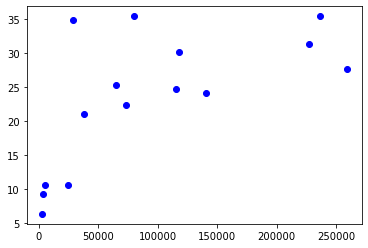

In [77]:
matplotlib.pyplot.scatter(Tree_RH_Plots.m_agb,Tree_RH_Plots.RH100,color='b')